In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split

In [2]:
import pickle

In [3]:
def load_data(test_size=0.3, random_state=4):
    data = load_iris()
    return train_test_split(data.data, data.target, test_size=test_size, random_state=random_state)

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
min_max = pd.DataFrame({
    "Min": df.min(),
    "Max": df.max()
})

print(min_max)

                   Min  Max
sepal length (cm)  4.3  7.9
sepal width (cm)   2.0  4.4
petal length (cm)  1.0  6.9
petal width (cm)   0.1  2.5
target             0.0  2.0


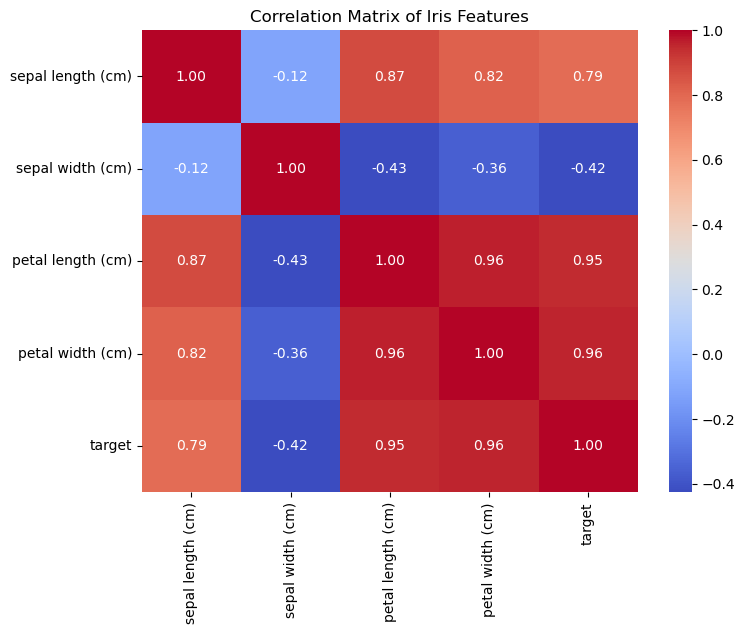

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Iris Features")
plt.show()

In [12]:
def train_model(X_train, y_train):
    model = LogisticRegression(
        C=0.1,
        max_iter=20,
        fit_intercept=True,
        n_jobs=3,
        solver='liblinear'
    )
    model.fit(X_train, y_train)
    return model

In [13]:
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [14]:
def load_model(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [15]:

from pathlib import Path

def main():
    X_train, X_test, y_train, y_test = load_data()
    model = train_model(X_train, y_train)

    model_path = Path("../api/iris_model.pkl")
    model_path.parent.mkdir(parents=True, exist_ok=True) 

    save_model(model, model_path)

    loaded_model = load_model(model_path)
    score = loaded_model.score(X_test, y_test)
    print(f"Test score: {score:.2f}")


In [16]:
if __name__ == "__main__":
    main()

Test score: 0.91


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  warnings.warn(


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.3, random_state=4)


model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


with open("iris_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as iris_model.pkl")


Model saved as iris_model.pkl
